In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

 
dataset = pd.read_csv('ds_salaries.csv'  )


### 1. Trend Analysis of Data Science Salaries (2020 onwards)

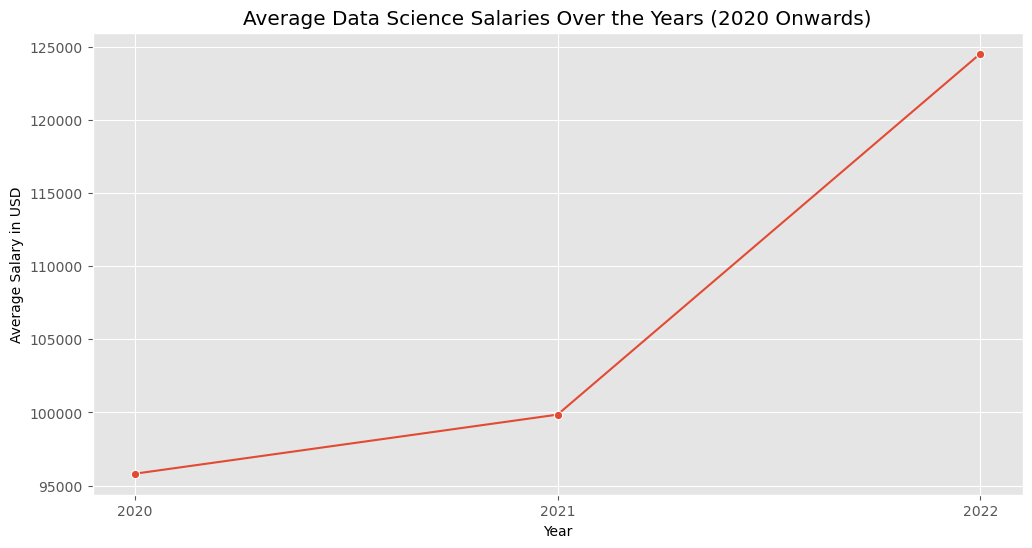

In [34]:
# Filtering relevant columns for analysis
df = dataset[['work_year', 'experience_level', 'salary_in_usd']]

# 1. Trend Analysis of Data Science Salaries (2020 onwards)
salary_trend = df.groupby('work_year')['salary_in_usd'].mean().reset_index() # Grouping data by year and calculating mean salary

# Plot for Average Data Science Salaries Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=salary_trend, marker='o')
plt.title('Average Data Science Salaries Over the Years (2020 Onwards)')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.xticks(salary_trend['work_year']) 
plt.grid(True)
plt.show()

### 2. Trend in Salary based on Experience Level

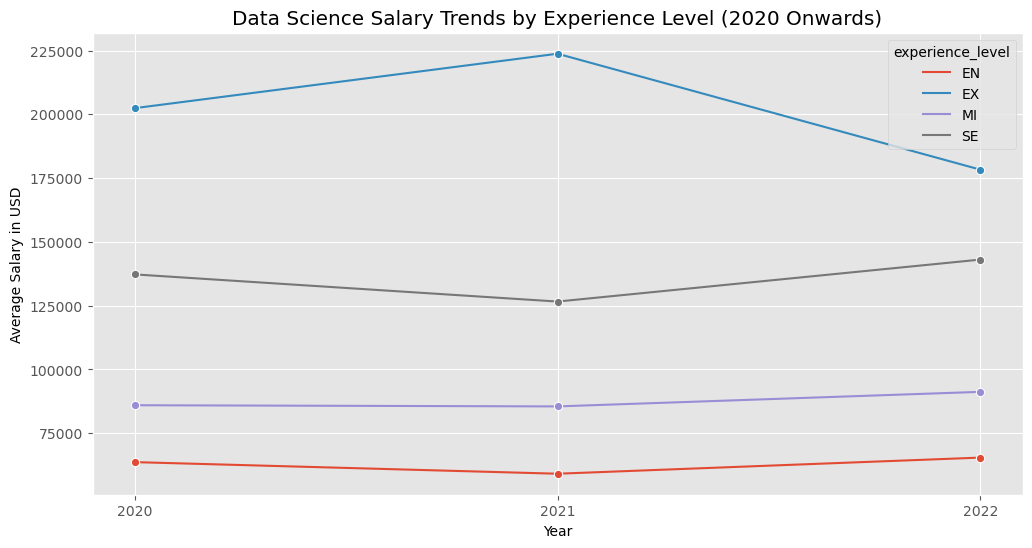

In [35]:
# 2. Trend in Salary based on Experience Level
salary_experience_trend = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index() # Grouping data by year and experience level, then calculating mean salary

# Plot for Data Science Salary Trends by Experience Level
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', hue='experience_level', data=salary_experience_trend, marker='o')
plt.title('Data Science Salary Trends by Experience Level (2020 Onwards)')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.xticks(salary_experience_trend['work_year'].unique()) 
plt.grid(True)
plt.show()

### 3. Countries offering the highest salaries for data science roles

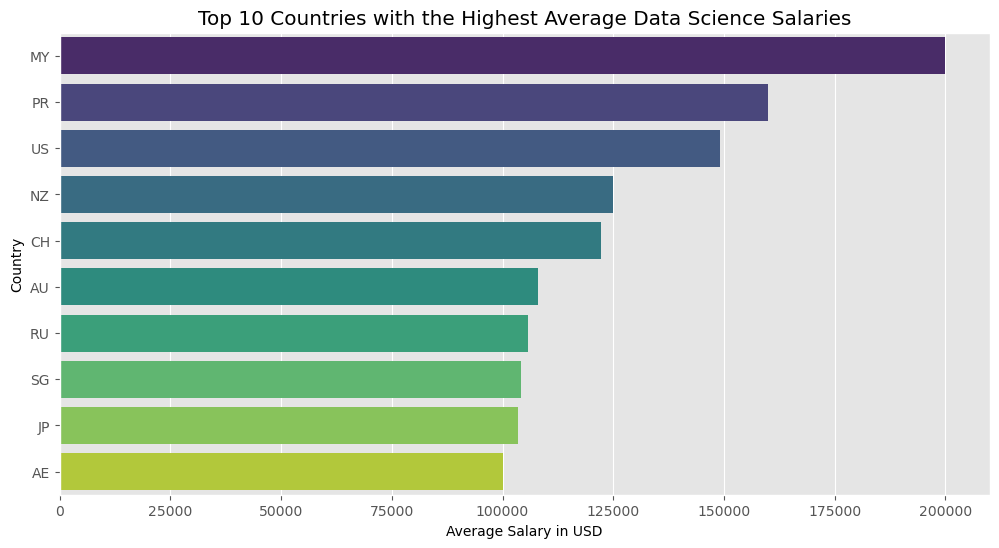

In [36]:
df2 = dataset[['work_year', 'experience_level', 'salary_in_usd', 'employee_residence']]

# 3. Countries offering the highest salaries for data science roles
country_salary = df2.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).reset_index() # Grouping data by country and calculating mean salary

# Displaying top 10 countries with the highest average data science salaries
top_countries_salary = country_salary.head(10)

# Plotting the top countries
plt.figure(figsize=(12, 6))
sns.barplot(x='salary_in_usd', y='employee_residence', data=top_countries_salary, palette='viridis')
plt.title('Top 10 Countries with the Highest Average Data Science Salaries')
plt.xlabel('Average Salary in USD')
plt.ylabel('Country')
plt.grid(True, axis='x')
plt.show()

### 4. Salary variation with experience level

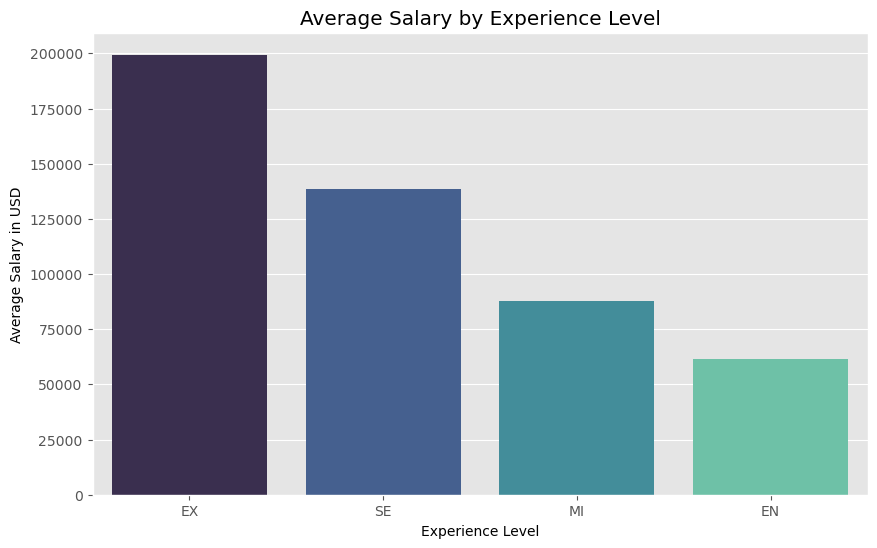

In [37]:
# Including 'experience_level' in the dataframe for analysis
df3 = dataset[['experience_level', 'salary_in_usd']]

# Grouping data by experience level and calculating mean salary
experience_salary = df3.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

# Plotting the salary variation with experience level
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=experience_salary, palette='mako')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.grid(True, axis='y')
plt.show()

### 5.Average salary increase when moving from one experience level to another

In [38]:
# Creating a dictionary to map experience levels in order of hierarchy
experience_order = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
experience_salary['level_order'] = experience_salary['experience_level'].map(experience_order)

# Sorting the dataframe based on level order
experience_salary_sorted = experience_salary.sort_values(by='level_order')

# Calculating the salary difference between consecutive levels
experience_salary_sorted['salary_increase'] = experience_salary_sorted['salary_in_usd'].diff()

# Displaying the average salary increase for each transition
print(experience_salary_sorted[['experience_level', 'salary_increase']])

  experience_level  salary_increase
3               EN              NaN
2               MI     26352.738156
1               SE     50621.236519
0               EX     60774.745604


### 6. Top 5 Most Common Currencies in Data Science Salaries

  currency  count
0      USD    398
1      EUR     95
2      GBP     44
3      INR     27
4      CAD     18


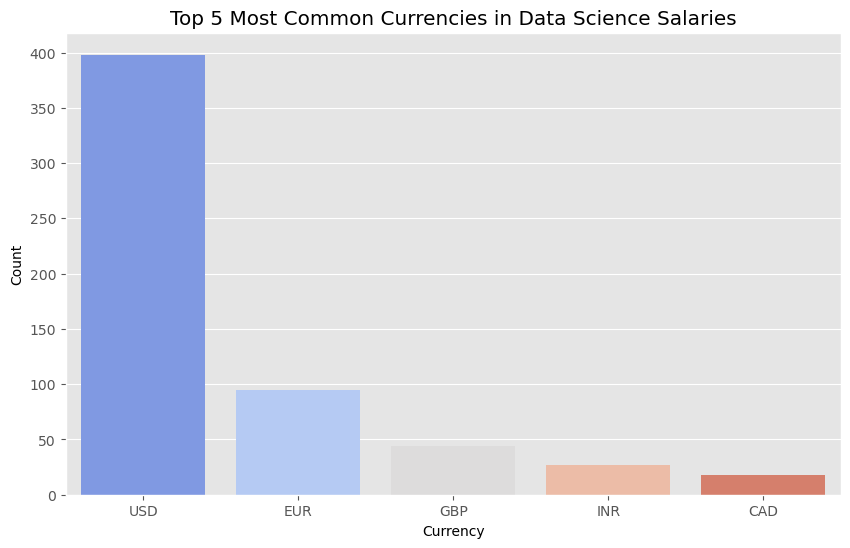

In [39]:
df4 = dataset[['salary_currency', 'salary_in_usd']]

# Counting the occurrence of each currency
currency_count = df4['salary_currency'].value_counts().reset_index()
currency_count.columns = ['currency', 'count']

# Taking the top 5 most common currencies
top_currencies = currency_count.head(5)

# Displaying the top currencies
print(top_currencies)

plt.style.use('ggplot')

# Using a different color palette
palette = sns.color_palette("coolwarm", n_colors=5)

# Plotting the most common currencies
plt.figure(figsize=(10, 6))
sns.barplot(x='currency', y='count', data=top_currencies, palette=palette)
plt.title('Top 5 Most Common Currencies in Data Science Salaries')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()